# Galton

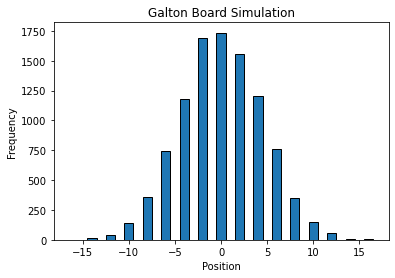

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def galton_sim(num_balls, n_nivel):
    ball_positions = []

    for _ in range(num_balls):
        position = 0
        for _ in range(n_nivel):
            position += np.random.choice([-1, 1]) #antes -0.5, 0.5
        ball_positions.append(position)

    return ball_positions

def plot_galton_bar_chart(ball_positions):
    freq = dict()
    for position in ball_positions:
        if position in freq:
            freq[position] += 1
        else:
            freq[position] = 1

    positions = list(freq.keys())
    frequencies = list(freq.values())

    fig, ax = plt.subplots()
    ax.bar(positions, frequencies, width=1, edgecolor='black')
    ax.set_xlabel('Position')
    ax.set_ylabel('Frequency')
    ax.set_title('Galton Board Simulation')

    plt.show()

num_balls = 10000
n_nivel = 20

ball_positions = galton_sim(num_balls, n_nivel)
plot_galton_bar_chart(ball_positions)

## Random Walk

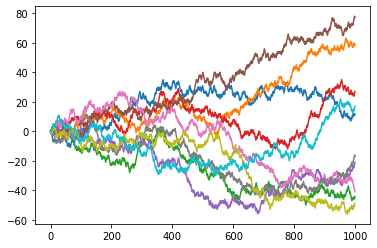

In [14]:
import numpy as np

ntot = 1000
Nc = 10
dx = 1
seed = 1

x = np.zeros((Nc,ntot)) # A coluna j dessa matriz guarda as posicoes sucessivas do caminhante j, com a posicao inicial sempre nula.
steps = np.linspace(0,ntot-1,ntot)

# Definindo a semente para a geracao de numeros pseudoaleatorios
np.random.seed(seed)

for k in range(Nc):
  for j in range(1, ntot):
    random = np.random.uniform(0.,1.) # distribuicao uniforme entre 0 e 1
    if random >= 1/2:
      x[k,j] = x[k,j-1] + dx
    else:
      x[k,j] = x[k,j-1] - dx


xmedio = np.mean(x,axis = 0)
xquad = np.mean(x**2,axis = 0)

for k in range(len(x)):
  plt.plot(steps,x[k])

plt.show()

# B3 Simulation

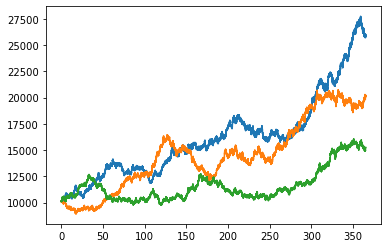

In [10]:
import numpy as np


N = 3
P0 = 10140.05
tf = 365
dt = 0.002777777777777778
mu = 0.002
sigma = 0.015
seed = 1

# Matriz que armazenará as simulações. Cada linha deve conter uma simulação diferente,
# com as colunas correspondo aos valores do índice Ibovespa nos diferentes instantes.
P = np.zeros((N, int(tf/dt)))

# Inicialização do gerador de números pseudoaleatórios
np.random.seed(seed)

P[:,0] = P0
for k in range(len(P)):
  for j in range(1,len(P[0])):
      random = np.random.uniform(0., 1.)  # Distribuição uniforme entre 0 e 1
      if random >= 0.5:
          rn = 1
      else:
          rn = -1
      P[k,j] =  (1 + mu*dt + sigma*rn*np.sqrt(dt))*P[k,j-1]

t = np.arange(0,tf,dt)
plt.plot(t,P[0])
plt.plot(t,P[1])
plt.plot(t,P[2])

# Random Walk 2D

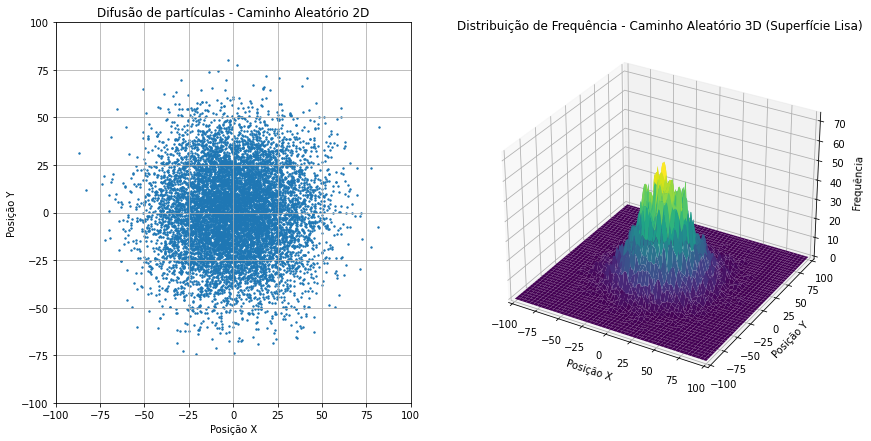

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# Parâmetros da simulação
n_particulas = 10000
n_passos = 1000    
limite = 100       
bins = 50  # Quantidade de bins para o histograma 2D

# Inicialização das partículas na origem (0,0)
x = np.zeros(n_particulas)
y = np.zeros(n_particulas)

for i in range(n_passos):
    # Cada passo pode ser para cima/baixo/esquerda/direita (0,1)
    angulos = np.random.uniform(0, 2 * np.pi, n_particulas)
    x += np.cos(angulos)
    y += np.sin(angulos)

# Plot da difusão das partículas 2D
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(121)
ax1.scatter(x, y, s=2)
ax1.set_xlim(-limite, limite)
ax1.set_ylim(-limite, limite)
ax1.set_title('Difusão de partículas - Caminho Aleatório 2D')
ax1.set_xlabel('Posição X')
ax1.set_ylabel('Posição Y')
ax1.grid(True)

hist, xedges, yedges = np.histogram2d(x, y, bins=bins, range=[[-limite, limite], [-limite, limite]])

xpos, ypos = np.meshgrid(xedges[:-1] + (xedges[1] - xedges[0]) / 2, 
                         yedges[:-1] + (yedges[1] - yedges[0]) / 2)

xpos_smooth, ypos_smooth = np.meshgrid(np.linspace(-limite, limite, 200), np.linspace(-limite, limite, 200))

z_smooth = griddata((xpos.ravel(), ypos.ravel()), hist.ravel(), (xpos_smooth, ypos_smooth), method='cubic')

z_smooth = np.nan_to_num(z_smooth)

# Plot da superfície 3D
ax3d = fig.add_subplot(122, projection='3d')
ax3d.plot_surface(xpos_smooth, ypos_smooth, z_smooth, cmap='viridis')

ax3d.set_xlim(-limite, limite)
ax3d.set_ylim(-limite, limite)
ax3d.set_zlim(0, np.max(z_smooth) * 1.2)
ax3d.set_title('Distribuição de Frequência - Caminho Aleatório 3D (Superfície Lisa)')
ax3d.set_xlabel('Posição X')
ax3d.set_ylabel('Posição Y')
ax3d.set_zlabel('Frequência')

plt.show()
